<!DOCTYPE html>
<html>
<head>
<style>
  h1, h2, h4 {
    margin-bottom: 0; /* Reduce the bottom margin */
  }
</style>
</head>
<body>

<h1 style="text-align: center; font-family: Times New Roman; margin-bottom: 0;">M<span style="font-size: x-large;">AGNETIC</span> M<span style="font-size: x-large;">ETHODS</span> L<span style="font-size: x-large;">AB</span> (GPC522)</h1>

<h2 style="text-align: center; font-family: Times New Roman; margin-top: 0;"><sup style="font-size: larger;">PRACTICAL - III</sup> </h2>

<h3 style="text-align: center; font-family: Times New Roman; margin-top: 0;"><sup style="font-size: larger; font-weight: bold;">Gauss Coefficients</sup> </h3>

<h4 style="text-align: center; font-family: 'Courier New'; margin-bottom: 0;">January 22, 2024</h4>
<h4 style="text-align: center; font-family: 'Courier New'; margin-bottom: 0;">Name: Riya Singh Rathore</h4>
<h4 style="text-align: center; font-family: 'Courier New';">Admission Number: 20JE0801</h4>
<h4 style="text-align: center; font-family: 'Times New Roman';">Visit: <a href="https://github.com/RiyaSinghRathore/Magnetic-Methods";">https://github.com/RiyaSinghRathore/Magnetic-Methods</a> for the Lab Repository</h4>
</body>
</html>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import pandas as pd
from docx import Document

#### <span style="font-family: Times New Roman;">The Gauss coefficients for the dipole and quadrupole components of the geomagnetic field from the various IGRF models are provided below.</span>

In [3]:
doc = Document('Assignments/Practical 3_WS_23-24.docx')

# Convert docx file to pandas dataframe
tables = []
for table in doc.tables:
    data = []
    for row in table.rows:
        row_data = []
        for cell in row.cells:
            row_data.append(cell.text)
        data.append(row_data)
    df = pd.DataFrame(data[1:], columns=data[0])  
    tables.append(df)

df

,gnm,IGRF-1985,IGRF-1990,IGRF-1995,IGRF-2000,IGRF-2005,IGRF-2010,IGRF-2015,IGRF-2020
0,g10,-29873,-29775,-29692,-29619.4,-29554.6,-29496.6,-29441.5,-29404.8
1,g11,-1905,-1848,-1784,-1728.2,-1669.05,-1586.42,-1501.77,-1450.9
2,h11,5500,5406,5306,5186.1,5077.99,4944.26,4795.99,4652.5
3,g20,-2072,-2131,-2200,-2267.7,-2337.24,-2396.06,-2445.88,-2499.6
4,g21,3044,3059,3070,3068.4,3047.69,3026.34,3012.2,2982
5,h21,-2197,-2279,-2366,-2481.6,-2594.5,-2708.54,-2845.41,-2991.6
6,g22,1687,1686,1681,1670.9,1657.76,1668.17,1676.35,1677
7,h22,-306,-373,-413,-458,-515.43,-575.73,-642.17,-734.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gnm        8 non-null      object
 1   IGRF-1985  8 non-null      object
 2   IGRF-1990  8 non-null      object
 3   IGRF-1995  8 non-null      object
 4   IGRF-2000  8 non-null      object
 5   IGRF-2005  8 non-null      object
 6   IGRF-2010  8 non-null      object
 7   IGRF-2015  8 non-null      object
 8   IGRF-2020  8 non-null      object
dtypes: object(9)
memory usage: 708.0+ bytes


In [9]:
# Convert columns to numeric (float) type
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)
for col in df.columns[1:]:  df[col] = df[col].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gnm        8 non-null      object
 1   IGRF-1985  8 non-null      int64 
 2   IGRF-1990  8 non-null      int64 
 3   IGRF-1995  8 non-null      int64 
 4   IGRF-2000  8 non-null      int64 
 5   IGRF-2005  8 non-null      int64 
 6   IGRF-2010  8 non-null      int64 
 7   IGRF-2015  8 non-null      int64 
 8   IGRF-2020  8 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 708.0+ bytes


#### <span style="font-family: Times New Roman;">(a). Calculate the root mean square intensity of the dipole and quadrople components of the geomagnetic field at the Earth's surface for IGRF Models.</span>

In [11]:
values2 = []
for col in df.iloc[0:3, 1:].columns:
    n = 1
    columns = df.iloc[0:2, 1:][col]
    d = np.sqrt(np.sum((n + 1) * columns ** 2))
    values2.append(d)

print("Root mean square intensity of dipole is:\n", np.array(values2).reshape(8, 1))

Root mean square intensity of dipole is:
 [[42332.61518026]
 [42189.23391103]
 [42066.55488628]
 [41958.81659437]
 [41862.26169236]
 [41773.90123031]
 [41689.93840245]
 [41634.06576351]]


In [12]:
values3 = []
for col in df.iloc[3:7, 1:].columns:
    n = 2
    columns = df.iloc[3:7, 1:][col]
    d = np.sqrt(np.sum((n + 1) * columns ** 2))
    values3.append(d)

print("Root mean square intensity of quadrupole is:\n", np.array(values3).reshape(8, 1))

Root mean square intensity of quadrupole is:
 [[7980.95821315]
 [8112.04271438]
 [8250.20308841]
 [8395.7442791 ]
 [8524.12980896]
 [8662.50194805]
 [8823.80360162]
 [8982.605691  ]]


#### <span style="font-family: Times New Roman;">(b). Plot the root mean square intensity of both dipole and quadrupole components of the geomagnetic field as a function of time.</span>

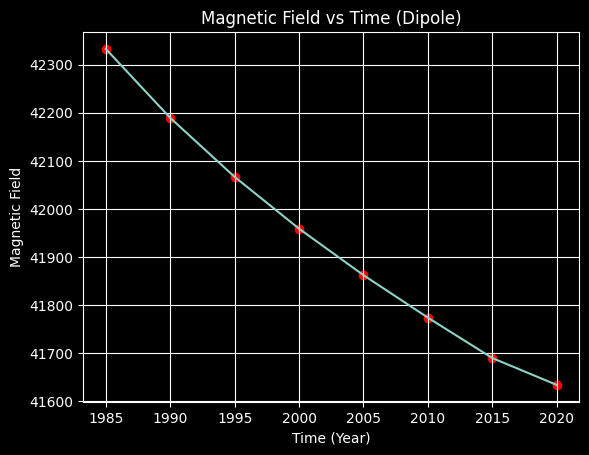

In [13]:
l = list(df.iloc[:, 1:].columns)
l1 = [int(i[5:]) for i in l]

plt.scatter(l1, values2, color='r')
plt.plot(l1, values2)
plt.xlabel("Time (Year)")
plt.ylabel("Magnetic Field")
plt.title("Magnetic Field vs Time (Dipole)")
plt.grid()

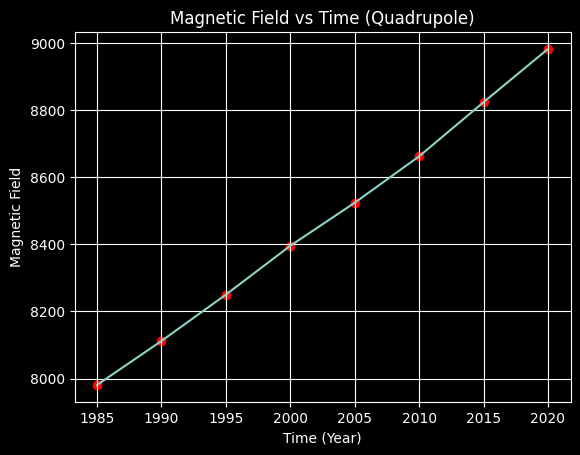

In [14]:
plt.scatter(l1, values3, color='r')
plt.plot(l1, values3)
plt.xlabel("Time (Year)")
plt.ylabel("Magnetic Field")
plt.title("Magnetic Field vs Time (Quadrupole)")
plt.grid()
plt.show()

#### <span style="font-family: Times New Roman;">(c). Estimate average rate change of both dipole and quadrupole components of the geomagnetic field.</span>

</br>

$$F=\sqrt{(n+1)\cdot \sum_{n=1} \sum_{m=0}{[(g_n^m)^2+(h_n^m)^2]} }$$
<h4 style="text-align: center; font-family: Times New Roman; margin-top: 0;"><sup>where, n = Order </br>  m = Degree </br> g,h = Gauss Coefficients</sup> </h4>

In [15]:
# Calculate the average rate of change per year for dipole and quadrupole
avg_dipole = np.mean(np.diff(values2) / np.diff(l1))
avg_quadpole = np.mean(np.diff(values3) / np.diff(l1))

print("Average rate of change per year for dipole:", avg_dipole)
print("Average rate of change per year for quadrupole:", avg_quadpole)

Average rate of change per year for dipole: -19.958554764387166
Average rate of change per year for quadrupole: 28.618499367248923
